In [1]:
from kbmodpy import kbmod as kb
from trajectoryFiltering import *
import numpy as np
import random as rd
import math
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
def p_im(image):
    fig = plt.figure(figsize=(12,12))
    plt.imshow(image , origin='lower',  vmin=-50, vmax=100)#cmap=plt.cm.Greys_r,
    plt.xlabel('X Pixels')
    plt.ylabel('Y Pixels')
    plt.colorbar()

In [3]:
im_count = 10
p = kb.psf(1.3)

In [4]:
images = [kb.layered_image(str(n), 3500, 3500, 10.0, 100.0, n/10) for n in range(im_count)]

In [5]:
for i in range(im_count):
    images[i].add_object(150+3*i, 135+3.5*i, 180.0, p)

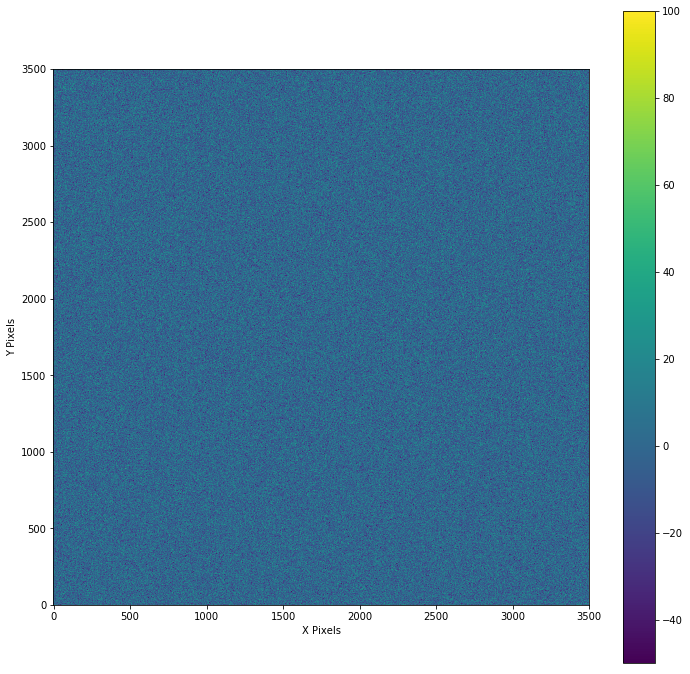

In [6]:
p_im(images[0].science())

In [7]:
stack = kb.image_stack(images)

In [8]:
search = kb.stack_search(stack, p)

In [9]:
%time
search.gpu(180, 100, 0.0, 1.0, 25.0, 50.0, 4)
search.get_results(0,20)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 4.29 µs


[lh: 11.138863 flux: 166.325500 x: 150 y: 135 x_v: 30.624966 y_v: 35.652649 obs_count: 10,
 lh: 11.127524 flux: 166.156204 x: 150 y: 135 x_v: 30.066160 y_v: 35.799282 obs_count: 10,
 lh: 11.127524 flux: 166.156204 x: 150 y: 135 x_v: 30.426424 y_v: 35.822239 obs_count: 10,
 lh: 11.127524 flux: 166.156204 x: 150 y: 135 x_v: 30.264582 y_v: 35.631695 obs_count: 10,
 lh: 11.021782 flux: 164.577271 x: 150 y: 136 x_v: 30.612255 y_v: 33.323452 obs_count: 10,
 lh: 10.989799 flux: 164.099701 x: 150 y: 136 x_v: 30.594755 y_v: 33.678047 obs_count: 10,
 lh: 10.972067 flux: 163.834915 x: 150 y: 136 x_v: 31.137209 y_v: 33.519199 obs_count: 10,
 lh: 10.972067 flux: 163.834915 x: 150 y: 136 x_v: 31.151783 y_v: 33.163479 obs_count: 10,
 lh: 10.740738 flux: 160.380707 x: 149 y: 135 x_v: 32.077911 y_v: 35.707249 obs_count: 10,
 lh: 10.726953 flux: 160.174866 x: 151 y: 135 x_v: 29.068233 y_v: 35.004112 obs_count: 10,
 lh: 10.726953 flux: 160.174866 x: 151 y: 135 x_v: 29.031965 y_v: 35.358273 obs_count: 10,

In [10]:
%time
search.region_search(30, 35, 20, 6, 4)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 11.2 µs


[ix: 150 iy: 135 fx: 177 fy: 167 depth: 0 obs_count: 10 lh: 11.035762 flux 164.785995,
 ix: 150 iy: 135 fx: 178 fy: 167 depth: 0 obs_count: 10 lh: 11.016375 flux 164.496506,
 ix: 150 iy: 136 fx: 178 fy: 166 depth: 0 obs_count: 10 lh: 10.972068 flux 163.834915,
 ix: 150 iy: 136 fx: 177 fy: 166 depth: 0 obs_count: 10 lh: 10.970606 flux 163.813095,
 ix: 150 iy: 135 fx: 177 fy: 166 depth: 0 obs_count: 10 lh: 10.916511 flux 163.005341,
 ix: 150 iy: 135 fx: 178 fy: 166 depth: 0 obs_count: 10 lh: 10.792407 flux 161.152222,
 ix: 150 iy: 136 fx: 178 fy: 167 depth: 0 obs_count: 10 lh: 10.536633 flux 157.333008,
 ix: 151 iy: 135 fx: 177 fy: 167 depth: 0 obs_count: 10 lh: 10.519873 flux 157.082748,
 ix: 151 iy: 135 fx: 178 fy: 167 depth: 0 obs_count: 10 lh: 10.500486 flux 156.793274,
 ix: 150 iy: 136 fx: 177 fy: 165 depth: 0 obs_count: 10 lh: 10.492072 flux 156.667618,
 ix: 151 iy: 136 fx: 178 fy: 166 depth: 0 obs_count: 10 lh: 10.468194 flux 156.311081,
 ix: 151 iy: 136 fx: 177 fy: 166 depth: 0 o

In [ ]:
path = '../../HITS/test_35/4,6tempExp/new_header/'

In [ ]:
files = os.listdir(path)
files.sort()
files = [path+f for f in files]
files = files[:4]
files

In [ ]:
images = [kb.layered_image(f) for f in files]